## 음향 Augmentation

In [1]:
import random

import os
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

import soundfile as sf
import librosa
import librosa.display
import random

import IPython.display as idp

# 푸리에 변환을 위한 라이브러리
import math
from scipy.interpolate import splrep, splev

In [2]:
sample_path = 'C:\workspace\data\sample.wav'
example_path = 'C:\workspace\data\example.wav'
wait_path = 'C:\workspace\data\wait.wav'
input_path = 'C:\workspace\data\input.wav'
wdata, wrate = librosa.load(wait_path, mono=True, sr=44100)


In [3]:
def plot_time_series(wdata) : 
    fig=plt.figure(figsize=(4,4))
    plt.title('Raw wave')
    plt.ylabel('Amplitude 진폭')
    plt.plot(np.linspace(0,1,len(wdata)),wdata)
    plt.show()

(66156,)-[44100]


c:\Users\93end\miniconda3\envs\speechenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\93end\miniconda3\envs\speechenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


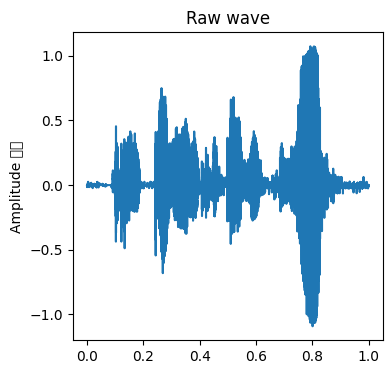

In [4]:
print(f'{wdata.shape}-[{wrate}]')
plot_time_series(wdata)
idp.Audio(data=wdata,rate=wrate)

## Spectrum 생성

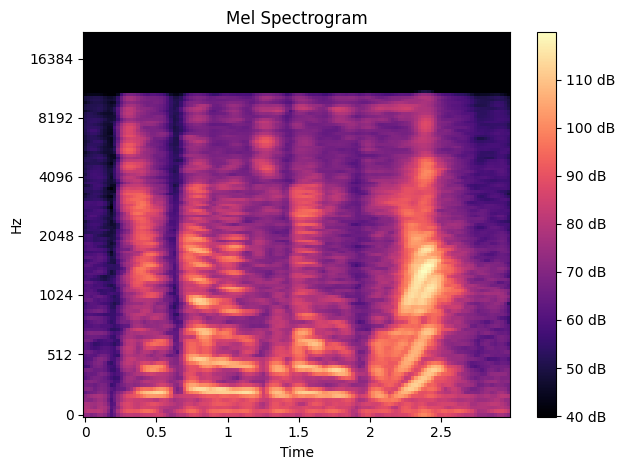

In [18]:
def my_mel_spectogram(data,rate):
    n_fft= 2048
    win_length =2048
    hop_length = 1024
    n_mels = 128
    
    stft_result = librosa.stft(data, n_fft=4096, win_length= 4096, hop_length=515)
    #stft_result 푸리에 변환이 적용된 스펙트럼
    D=np.abs(stft_result)
    mel_spec = librosa.feature.melspectrogram(S =D, sr=rate, n_mels=n_mels,hop_length=hop_length, win_length=win_length)
    librosa.display.specshow(librosa.amplitude_to_db(mel_spec,ref=0.00002),
                             sr =rate, hop_length=hop_length, y_axis='mel',x_axis='time')

    plt.title('Mel Spectrogram')
    plt.colorbar(format='%2.0f dB')
    plt.tight_layout()
    plt.show()
    
my_mel_spectogram(wdata, wrate)

# 1.White Noise
원본 데이터에 잡음 추가 : 모델이 학습을 할 때 너무 깨끗한 데이터만 학습하면 실제에서 잡음이 섞인 데이터가 들어오면 제대로 결과를 도출하지 못하기에 쓰는 방법

In [19]:
def add_white_noise(data, sr = 22050, noise_rate = 0.005):
    wn = np.random.randn(len(data)) # 데이터 길이를 이용한 임의의 값
    data_wn = data + noise_rate*wn
    plot_time_series(data_wn)
    sf.write('./'+'white_noise_wait.wav', data_wn,sr)
    return data_wn

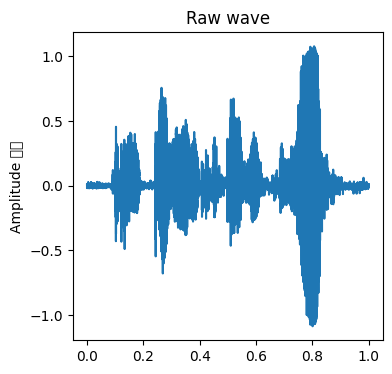

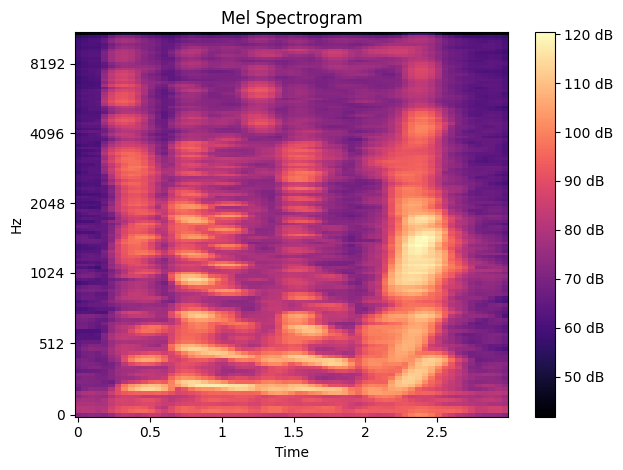

In [20]:
data_wn =add_white_noise(wdata, wrate)

data ,rate = librosa.load('C:\workspace\white_noise_wait.wav')
idp.Audio(data=data, rate=rate)
my_mel_spectogram(data, rate)

## 2.Shifting
원본 데이터를 이동시키는 방법

In [24]:
def shifting_sound(data, sr = 22050, roll_rate = 0.1):
    data_roll = np.roll(data, int(len(data)*roll_rate))
    # shifting 예
    #[1,2,3,4] -> [4,1,2,3,]으로 만드는 과정
    
    plot_time_series(data_roll)
    sf.write('./'+'shifting_wait.wav', data_roll,sr)
    
    return data_roll
    

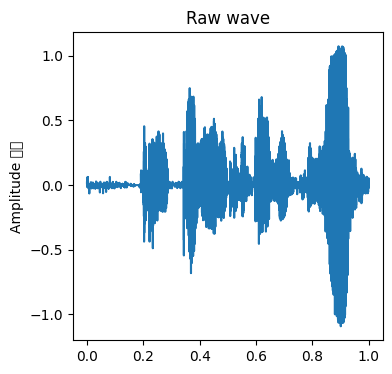

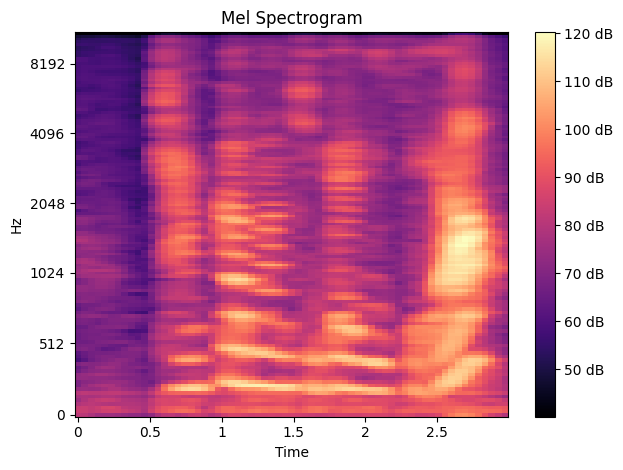

In [25]:
shifting_sound(wdata,wrate)

data , rate =librosa.load('shifting_wait.wav')
idp.Audio(data=data, rate=rate)
my_mel_spectogram(data, rate)

## 3. Stretching
원본 데이터를 늘어지게 하는 방법

In [30]:
def stretch_sound(data, sr= 22050, rate=0.8):
    strech_data = librosa.effects.time_stretch(data, rate=rate)
    
    plot_time_series(strech_data)
    sf.write('./'+'strech_wait.wav', strech_data,sr)
    
    return strech_data
    

c:\Users\93end\miniconda3\envs\speechenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\93end\miniconda3\envs\speechenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


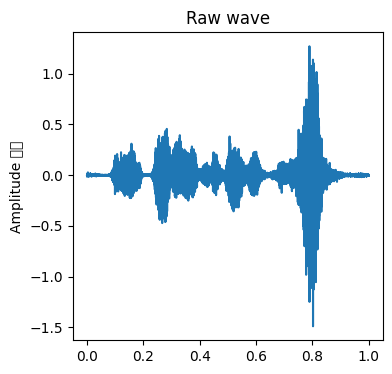

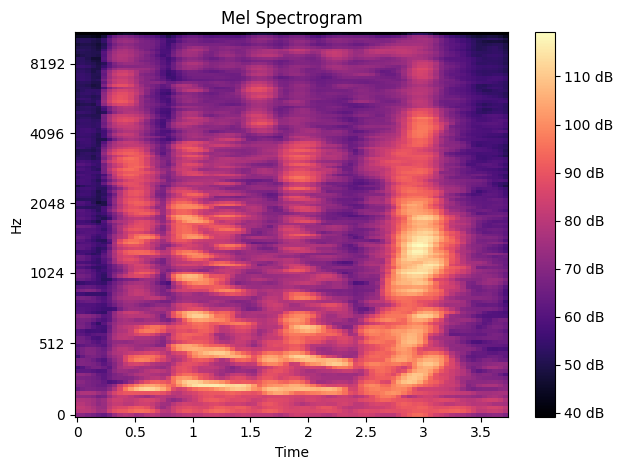

In [29]:
stretch_sound(wdata,wrate)

data , rate =librosa.load('strech_wait.wav')
idp.Audio(data=data, rate=rate)
my_mel_spectogram(data, rate)

## 4. Reverse
원본 데이터를 반전 시키는 방법

In [34]:
def reverse_sound(data, sr = 22050):
    reverse_data =np.array([data[len(data)-1 -i] for i in range(len(data))])
    
    plot_time_series(reverse_data)
    sf.write('./'+'reverse_wait.wav', reverse_data,sr)
    
    return reverse_data

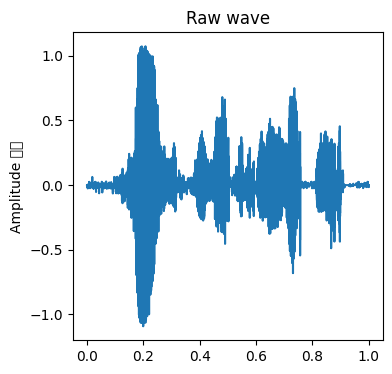

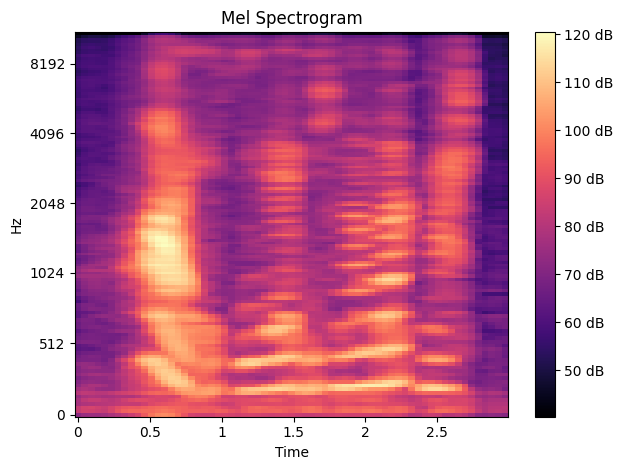

In [35]:
reverse_sound(wdata,wrate)

data , rate =librosa.load('reverse_wait.wav')
idp.Audio(data=data, rate=rate)
my_mel_spectogram(data, rate)

## 5. Minus
원본 데이터를 대칭으로 데이터 위치 변환

In [37]:
def minus_sound(data, sr =22050):
    temp_numpy = (-1)*data
    
    plot_time_series(temp_numpy)
    sf.write('./'+'minus_wait.wav', temp_numpy,sr)
    
    return temp_numpy

c:\Users\93end\miniconda3\envs\speechenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\93end\miniconda3\envs\speechenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


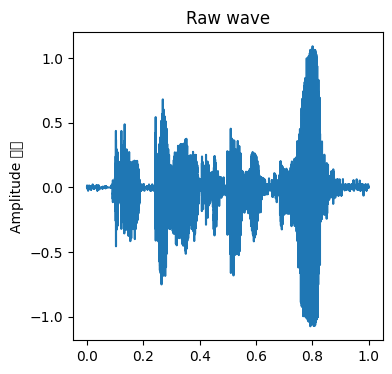

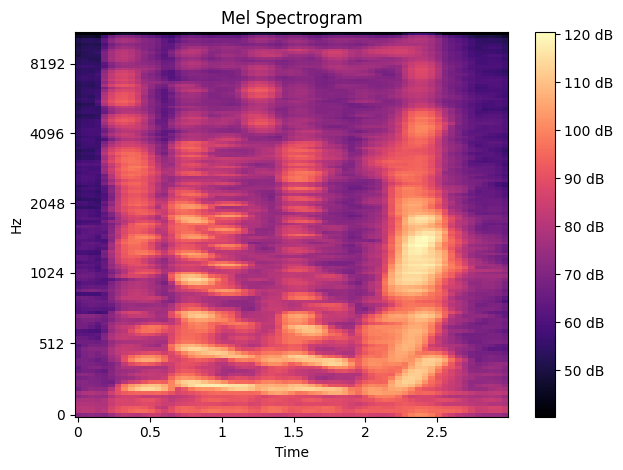

In [38]:
minus_sound(wdata,wrate)

data , rate =librosa.load('minus_wait.wav')
idp.Audio(data=data, rate=rate)
my_mel_spectogram(data, rate)